In [1]:
from scipy.spatial import ConvexHull
from sklearn.decomposition import PCA
import numpy as np
import cdd

v = np.array([[1.0,0.0,1.0],[ 0.0,2.0,1.0], [ 0.0,0.0,1.0], [ 1.0,2.0,1.0]])

v6 = np.array([[1.0,-1.0],[2.0,0.0],[3.0,1.0],[-1.0,1.0],[-2.0,0.0],[-3.0,-1.0]])


In [2]:

import matplotlib.pyplot as plt
%matplotlib inline 


In [3]:
pca = PCA(n_components=2)
pca.fit(v6)
C = pca.components_
mean = pca.mean_
low_dim_pts = pca.transform(v6)
print (v6)
print (C)
print (mean)
print (low_dim_pts)

[[1. 0. 1.]
 [0. 2. 1.]
 [0. 0. 1.]
 [1. 2. 1.]]
[[ 0.98708746  0.16018224]
 [ 0.16018224 -0.98708746]]
[0. 0.]
[[ 0.82690521  1.1472697 ]
 [ 1.97417492  0.32036449]
 [ 3.12144462 -0.50654073]
 [-0.82690521 -1.1472697 ]
 [-1.97417492 -0.32036449]
 [-3.12144462  0.50654073]]


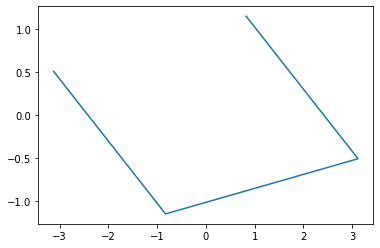

In [4]:
plt.figure()
plt.plot(low_dim_pts[:,0],low_dim_pts[:,1])

In [3]:
explain_ratio = np.cumsum(pca.explained_variance_ratio_)

first_dims = np.argmax(explain_ratio >= 1.0-0.00001)

low_dim_pts_reduct = low_dim_pts[:,0:first_dims+1]

# decide how many to remove...
print (low_dim_pts_reduct)

[[-1.   0.5]
 [ 1.  -0.5]
 [-1.  -0.5]
 [ 1.   0.5]]


In [4]:
hull = ConvexHull(points=low_dim_pts_reduct)
A = hull.equations[:,:-1]
b = -hull.equations[:,-1]
print (A,b)

[[-1. -0.]
 [ 0. -1.]
 [ 0.  1.]
 [ 1. -0.]] [1.  0.5 0.5 1. ]


In [22]:
n_rows = A.shape[0]
n_cols = A.shape[1]

zero4 = np.zeros((n_rows,1))
zero_1= np.append(np.zeros((1,n_cols)), 1.0)
zero_n1= np.append(np.zeros((1,n_cols)), -1.0)

trueA = np.vstack([np.hstack([A, zero4]),zero_1,zero_n1])
trueB = np.append(b, [0.0, 0.0])
print (trueA)
print (trueB)

[[-1. -0.  0.]
 [ 0. -1.  0.]
 [ 0.  1.  0.]
 [ 1. -0.  0.]
 [ 0.  0.  1.]
 [ 0.  0. -1.]]
[1.  0.5 0.5 1.  0.  0. ]


In [21]:
print (mean)
print (trueA.shape)
print (trueA)
print (C)
print (C.shape)
print (trueB)

[0.5 1.  1. ]
(6, 3)
[[-1. -0.  0.]
 [ 0. -1.  0.]
 [ 0.  1.  0.]
 [ 1. -0.  0.]
 [ 0.  0.  1.]
 [ 0.  0. -1.]]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
(3, 3)
[1.  0.5 0.5 1.  0.  0. ]


In [18]:
finalA = np.matmul(trueA, C.T)
print (finalA)

[[ 0. -1.  0.]
 [-1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  0. -1.]]


In [27]:
np.matmul(finalA, mean)

array([-1. , -0.5,  0.5,  1. ,  1. , -1. ])

In [28]:
np.matmul(finalA, mean)+trueB

array([ 0.,  0.,  1.,  2.,  1., -1.])

In [35]:
print (C)
print (C.T)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [34]:
errA = np.matmul(trueA, C)
print (errA)

[[ 0. -1.  0.]
 [-1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  0. -1.]]
